<a href="https://colab.research.google.com/github/SkyHonor/Research-on-Deep-Learning-Algorithms/blob/main/transfer-learning/ResNet18%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from PIL import Image, ImageFile
import torch.nn.functional as F

In [ ]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Dataset
import random
import numpy as np
import torch
from PIL import Image, ImageFile
import matplotlib.pyplot as plt

!wget http://usrbb.ru/botainika/Pepper.zip
!unzip Pepper.zip


transformation = transforms.Compose([transforms.Resize((256,256)),
                                     transforms.ToTensor()
                                    ])

data_path = datasets.ImageFolder(root="Pepper", transform = transformation)
batch_size = 16

train_dataloader = DataLoader(data_path,
                        shuffle=True,
                        num_workers=1,
                        batch_size=batch_size)

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_path, test_size=0.2, random_state=0)

train_data_size = len(train)
test_data_size = len(test)

batch_size=8
train_data_loader = DataLoader(train, batch_size=batch_size)
test_data_loader = DataLoader(test, batch_size=batch_size)

In [ ]:
model = models.resnet18(pretrained=True)

In [ ]:
print(model)

In [ ]:
num_classes = len(data_path.classes)
model.fc = nn.Linear(512, num_classes)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
device = torch.device("cuda")

In [ ]:
from torch import optim

net = model.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.0001 )

epochs = 30
counter = []
loss_history = []
iteration_number= 0

Epoch number 0
 Current loss 2.7036967277526855

Epoch number 0
 Current loss 1.5824801921844482

Epoch number 1
 Current loss 0.620268702507019

Epoch number 1
 Current loss 0.4674631357192993

Epoch number 2
 Current loss 0.20964789390563965

Epoch number 2
 Current loss 0.16715484857559204

Epoch number 3
 Current loss 0.11380898952484131

Epoch number 3
 Current loss 0.12060482800006866

Epoch number 4
 Current loss 0.04525614529848099

Epoch number 4
 Current loss 0.11026772111654282

Epoch number 5
 Current loss 0.03264462575316429

Epoch number 5
 Current loss 0.02424316667020321

Epoch number 6
 Current loss 0.0216873399913311

Epoch number 6
 Current loss 0.0263908002525568

Epoch number 7
 Current loss 0.016020653769373894

Epoch number 7
 Current loss 0.014396818354725838

Epoch number 8
 Current loss 0.013908891007304192

Epoch number 8
 Current loss 0.02799949049949646

Epoch number 9
 Current loss 0.008763584308326244

Epoch number 9
 Current loss 0.014579442329704762

Ep

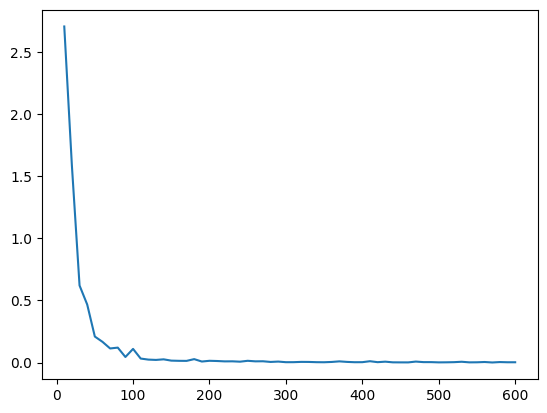

In [ ]:
import matplotlib.pyplot as plt
for epoch in range(30):

    for i, (inputs, labels) in enumerate(train_dataloader, 0):

        inputs, labels = inputs.cuda(), labels.cuda()

        optimizer.zero_grad()

        outputs = net(inputs)

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        if i % 10 == 0 :
            print(f"Epoch number {epoch}\n Current loss {loss.item()}\n")
            iteration_number += 10

            counter.append(iteration_number)
            loss_history.append(loss.item())

plt.plot(counter, loss_history)

In [ ]:
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

loss_func = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

def train_and_validate(model, loss_criterion, optimizer, epochs=25):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_loss = 100000.0
    best_epoch = None
    model = model.to(device)

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        # Set to training mode
        model.train()

        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_data_loader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

            #print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))


        # Validation - No gradient tracking needed
        with torch.no_grad():

            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(test_data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
        if valid_loss < best_loss:
            best_loss = valid_loss
            best_epoch = epoch

        # Find average training loss and training accuracy
        avg_train_loss = train_loss/train_data_size
        avg_train_acc = train_acc/train_data_size

        # Find average training loss and training accuracy
        avg_valid_loss = valid_loss/test_data_size
        avg_valid_acc = valid_acc/test_data_size

        history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss - {:.4f}, Accuracy - {:.4f}%, \n\t\tValidation : Loss - {:.4f}, Accuracy - {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc*100, avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start))

        # Save if the model has best accuracy till now
        #torch.save(model, '_model_'+str(epoch)+'.pt')

    return model, history, best_epoch

Epoch: 1/50
Epoch : 000, Training: Loss - 1.7012, Accuracy - 53.7383%, 
		Validation : Loss - 39.9239, Accuracy - 12.9630%, Time: 1.2916s
Epoch: 2/50
Epoch : 001, Training: Loss - 1.8461, Accuracy - 46.7290%, 
		Validation : Loss - 2.2177, Accuracy - 37.0370%, Time: 1.0730s
Epoch: 3/50
Epoch : 002, Training: Loss - 1.0904, Accuracy - 65.8879%, 
		Validation : Loss - 1.6639, Accuracy - 50.0000%, Time: 1.0748s
Epoch: 4/50
Epoch : 003, Training: Loss - 0.4983, Accuracy - 83.6449%, 
		Validation : Loss - 2.5279, Accuracy - 33.3333%, Time: 1.0778s
Epoch: 5/50
Epoch : 004, Training: Loss - 0.3271, Accuracy - 89.7196%, 
		Validation : Loss - 1.3820, Accuracy - 59.2593%, Time: 1.2767s
Epoch: 6/50
Epoch : 005, Training: Loss - 0.2849, Accuracy - 89.7196%, 
		Validation : Loss - 1.7838, Accuracy - 55.5556%, Time: 1.3333s
Epoch: 7/50
Epoch : 006, Training: Loss - 0.1853, Accuracy - 93.9252%, 
		Validation : Loss - 1.5867, Accuracy - 50.0000%, Time: 1.2165s
Epoch: 8/50
Epoch : 007, Training: Loss 

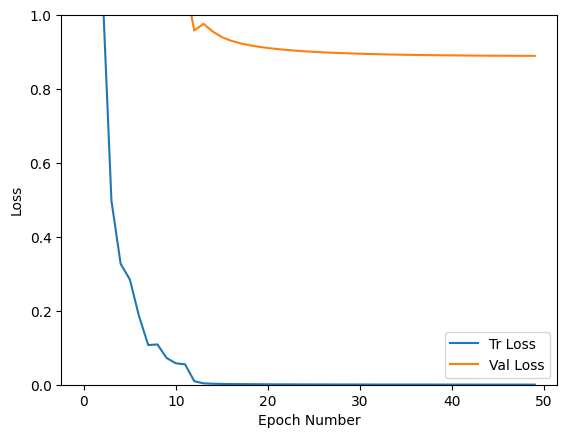

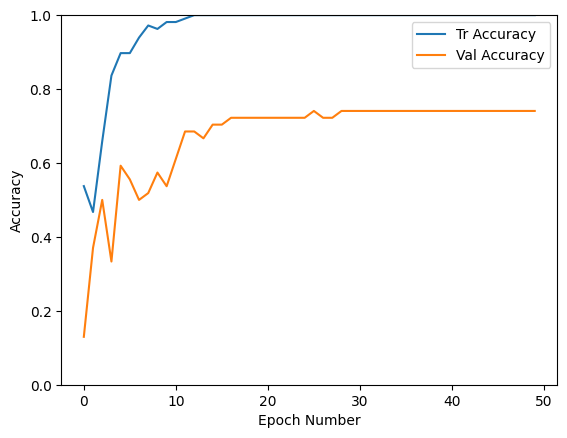

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_epochs = 50
trained_model, history, best_epoch = train_and_validate(net, loss_func, optimizer, num_epochs)

#torch.save(history, '_history.pt')
history = np.array(history)
plt.plot(history[:,0:2])
plt.legend(['Tr Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.show()
plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()